The Aim of this task is to analyse customer reviews of British Airways from Skytrax website using Topic Modelling, Sentiment Analysis and Word Cloud.

In [ ]:
# THE BEAUTIFUL SOUP CODE WAS PROVIDED TO PARSE THE PAGES OF THE REVIEW INTO A PANDAS DATAFRAME AND SAVED AS A CSV FILE

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 36
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,Not Verified | They changed our Flights from ...
1,Not Verified | At Copenhagen the most chaotic...
2,✅ Trip Verified | Worst experience of my life...
3,✅ Trip Verified | Due to code sharing with Ca...
4,✅ Trip Verified | LHR check in was quick at t...
5,✅ Trip Verified | I wouldn't recommend Britis...
6,✅ Trip Verified | Absolutely horrible experie...
7,Not Verified | This is the worst airline. Not...
8,✅ Trip Verified | I will never fly British Ai...
9,✅ Trip Verified | Worst aircraft I have ever ...


In [5]:
df.to_csv("C:\\Users\\lutol\\Desktop\\Projects\\BA\\data\\BA_reviews.csv")

In [ ]:
# All reviews totalling 3531 was loaded and saved into csv, ready for data cleaning, analysis and modelling.

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Remove non-relevant information
reviews = [re.sub(r'^[a-zA-Z0-9]+\s\|\s', '', review) for review in reviews]
reviews = [re.sub(r'\s[A-Z]+\s[A-Z]+\s\|\s.*$', '', review) for review in reviews]

# Convert text to lowercase
reviews = [review.lower() for review in reviews]

# Remove punctuation and special characters
reviews = [re.sub(r'[^\w\s]', '', review) for review in reviews]

# Tokenize text into individual words
reviews = [word_tokenize(review) for review in reviews]

# Remove stopwords
stop_words = set(stopwords.words('english'))
reviews = [[word for word in review if word not in stop_words] for review in reviews]

# Perform lemmatization
lemmatizer = WordNetLemmatizer()
reviews = [[lemmatizer.lemmatize(word) for word in review] for review in reviews]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lutol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lutol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lutol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# TOPIC MODELLING

In [7]:
import gensim
from gensim import corpora
import nltk
from nltk.corpus import stopwords
import string

# Create list of stopwords
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)

# Tokenize the reviews
tokenized_reviews = [review.lower().split() for review in df['reviews']]

# Remove stopwords and words with length less than 3
tokenized_reviews = [[word for word in review if word not in stopwords_list and len(word) > 2] for review in tokenized_reviews]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(tokenized_reviews)

# Filter out words that occur less than 5 documents, or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(review) for review in tokenized_reviews]

# Set parameters for the LDA model
num_topics = 10
passes = 10

# Create the LDA model
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes)

# Print the topics and their top words
for idx, topic in lda_model.print_topics(num_topics=num_topics, num_words=10):
    print(f'Topic: {idx} \nWords: {topic}\n')


Topic: 0 
Words: 0.014*"british" + 0.010*"airways" + 0.010*"london" + 0.009*"heathrow" + 0.009*"flights" + 0.008*"one" + 0.007*"check" + 0.007*"get" + 0.006*"seats" + 0.006*"service"

Topic: 1 
Words: 0.012*"british" + 0.012*"class" + 0.012*"business" + 0.010*"seat" + 0.010*"economy" + 0.010*"airways" + 0.010*"food" + 0.010*"service" + 0.008*"seats" + 0.007*"cabin"

Topic: 2 
Words: 0.016*"first" + 0.016*"cabin" + 0.014*"crew" + 0.014*"good" + 0.012*"class" + 0.010*"food" + 0.009*"seat" + 0.009*"business" + 0.009*"seats" + 0.008*"service"

Topic: 3 
Words: 0.014*"staff" + 0.013*"delayed" + 0.013*"minutes" + 0.013*"boarding" + 0.011*"passengers" + 0.011*"late" + 0.011*"hour" + 0.010*"due" + 0.010*"time" + 0.009*"delay"

Topic: 4 
Words: 0.029*"seat" + 0.021*"seats" + 0.013*"food" + 0.011*"good" + 0.009*"entertainment" + 0.008*"crew" + 0.007*"cabin" + 0.006*"one" + 0.006*"front" + 0.006*"would"

Topic: 5 
Words: 0.018*"would" + 0.011*"told" + 0.011*"staff" + 0.009*"get" + 0.009*"said" + 

In [ ]:
# Top 10 Topics with the Top 10 words in each category is displayed, showing the most frequently used words and topic discussion in the reviews
# From the plot we can see British, Airways and London as top words in the first Topic and Lounge, Good and Crew being top words in the tenth Topic. 

In [8]:
!pip install pyLDAvis

In [11]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

# prepare the data for visualization
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

pyLDAvis.display(vis)





C:\Users\lutol\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [ ]:
# The pyLDAvis visualization above shows a scatterplot and bar plot of top 10 topics and the 30 most relevant terms in each topic in descending order.
# This visualization also shows relationship between each top and its most relevant terms and its correlation to other topics and their most relevant terms.
# This plot allows you to select the preferred topics and adjust the preferred metrics to view the relationship between each Topic and Top words

In [12]:
# save the visualization as an HTML file
pyLDAvis.save_html(vis, 'topic_modeling_visualization.html')


In [ ]:
# WORD CLOUD

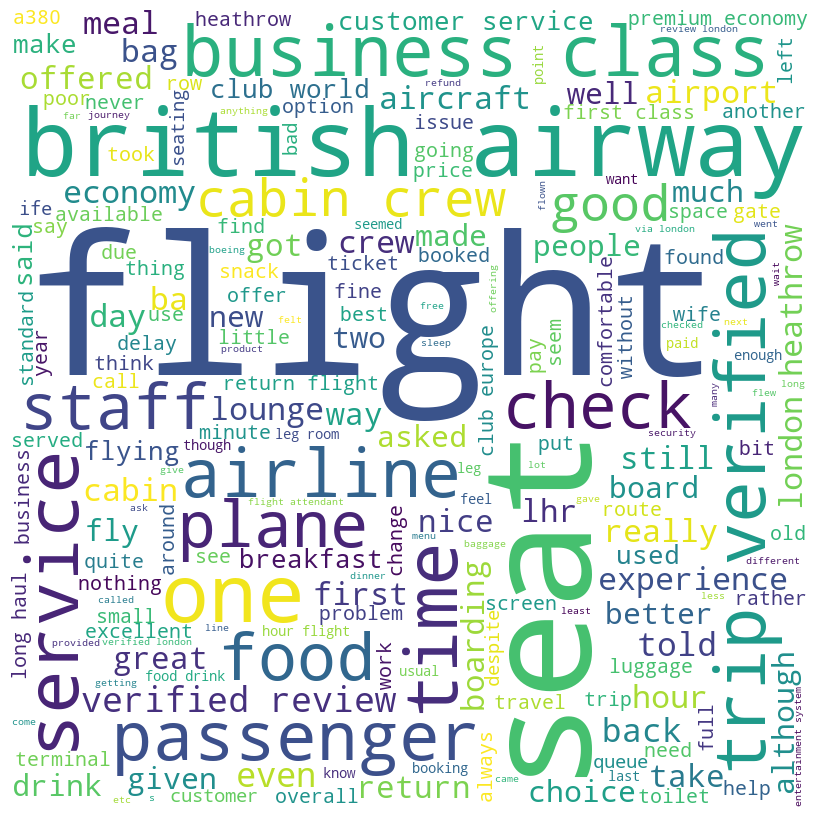

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# join all tokenized reviews into a single string
text = ' '.join([word for review in tokenized_reviews for word in review])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

# Display the generated image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
  
plt.show()


In [ ]:
# The word cloud shows the most frequent terms in the review with respect to their frequencies with larger text being more frequent than smaller text.
# From the word cloud we see words like FLIGHT,SEAT,BRITISH AIRWAYS,BUSINESS CLASS,TRIP VERIFIED,PASSENGER,SERVICE,STAFF,PLANE,CABIN CREW,AIRLINE all visible as frequent text.


In [ ]:
# TOPIC AND TOP WORD VISUALIZATIONS USING BAR CHARTS

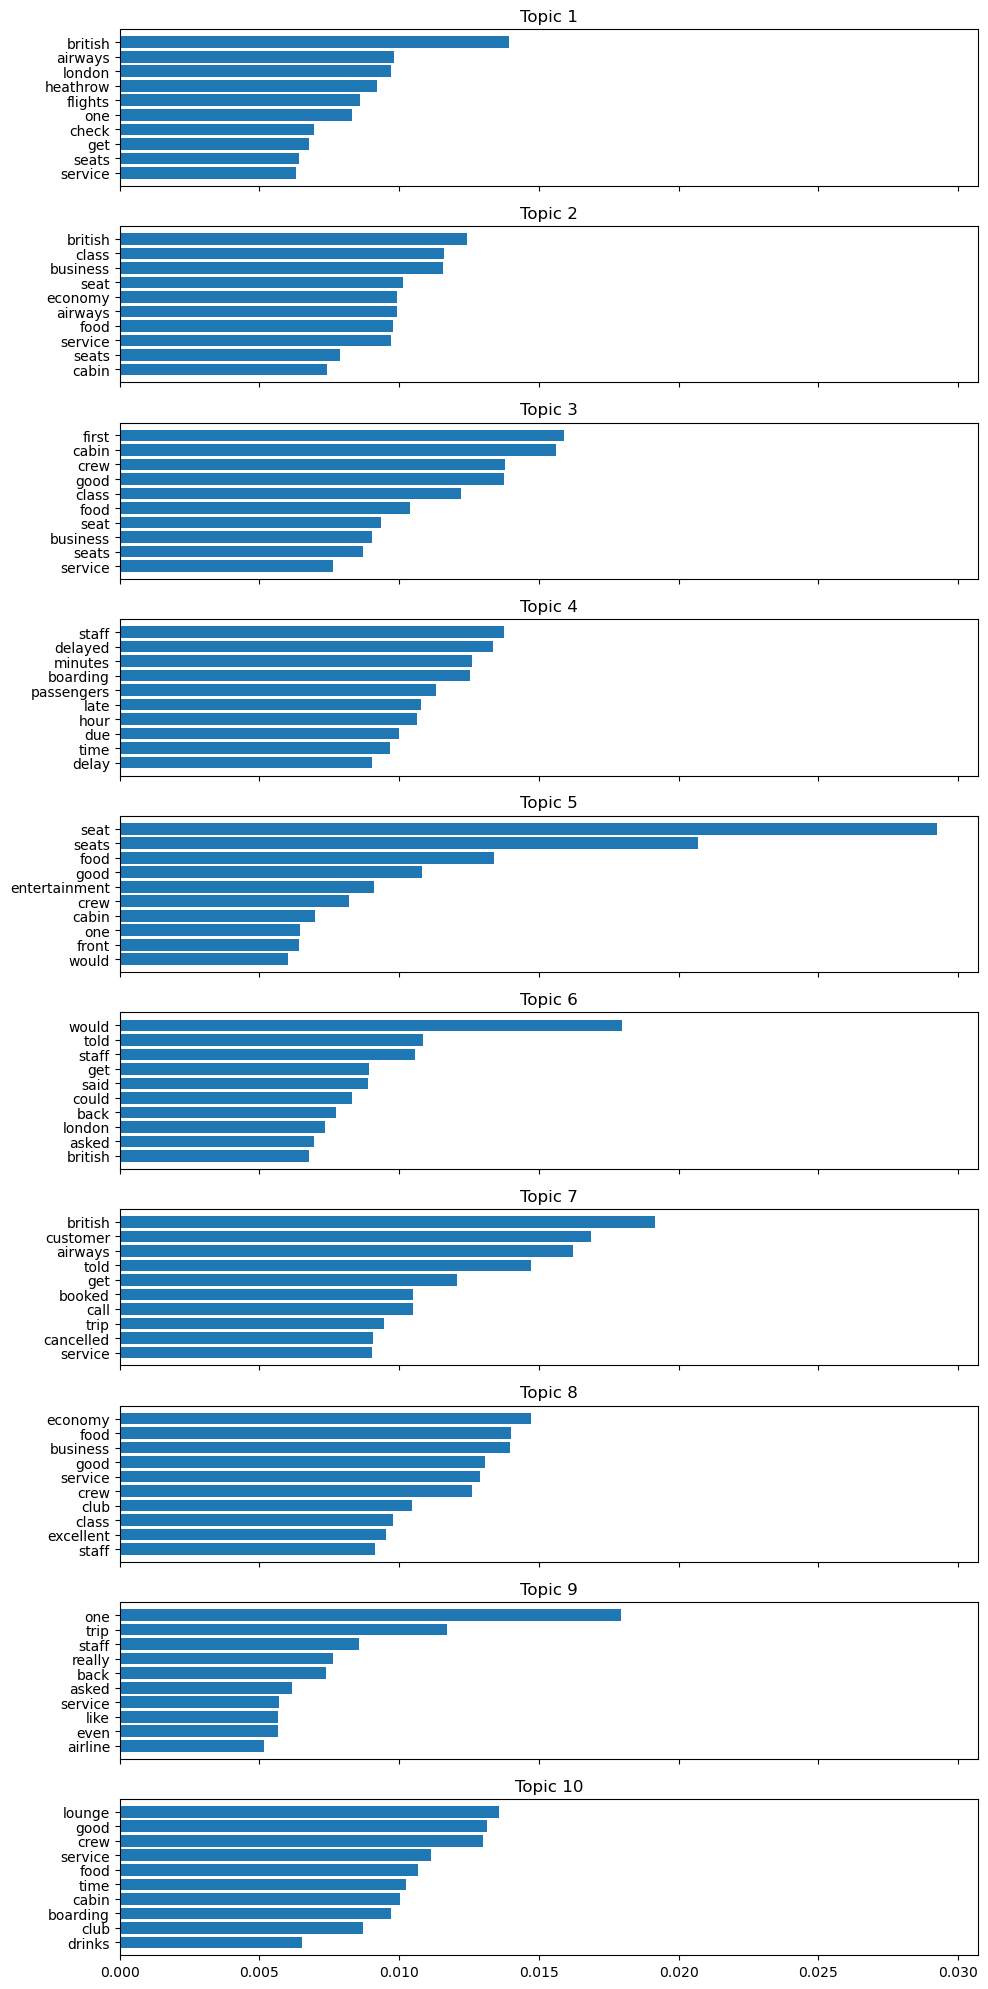

In [38]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=num_topics, figsize=(10, 20), sharex=True)

for i, topic in enumerate(lda_model.show_topics(num_topics=num_topics, formatted=False)):
    words, values = zip(*topic[1])
    words = list(words)
    values = list(values)
    # sort words and values in descending order of the values
    words, values = zip(*sorted(zip(words, values), key=lambda x: x[1], reverse=True))
    # select the top n words for each topic
    n = 10
    words = [' '.join(word.split('_')) for word in words[:n]]
    values = values[:n]
    axs[i].barh(range(n), values)
    axs[i].invert_yaxis()
    axs[i].set_yticks(range(n))
    axs[i].set_yticklabels(words)
    axs[i].set_title(f"Topic {i+1}")

plt.tight_layout()
plt.show()



In [ ]:
# THE BAR PLOT ABOVE SHOWS EACH TOP 10 TOPIC AND THEIR TOP 10 WORDS IN DESC ORDER OF FREQUENCY

In [ ]:
# From the plot above we can determine what words are Top in each Topic to the least with SEAT,SERVICE as least in Topic 1 while CLUB,DRINKS are least in 10.
# THis plot gives you the opportunity to determine the level of importance of each word in that Topic and furthermore words that are in multiple topics, as well
# As showing you how the multiple words rank in various Topics found which can be a good way to start at further mapping Key issues with customer service.

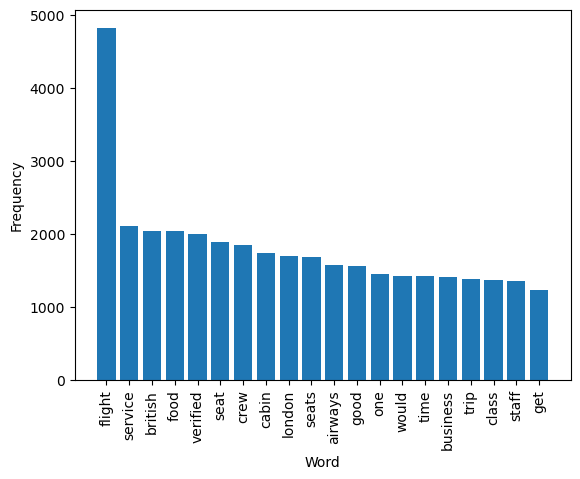

In [41]:
from collections import Counter
import matplotlib.pyplot as plt

# Assume that 'review' is a string containing the text of the review
words = text.split()  # Split the review into words
word_counts = Counter(words)  # Count the frequency of each word
top_words = word_counts.most_common(20)  # Get the top 20 words and their frequency

# Create a vertical bar chart
plt.bar(range(len(top_words)), [w[1] for w in top_words])
plt.xticks(range(len(top_words)), [w[0] for w in top_words], rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()



In [ ]:
# THIS BAR PLOT SHOWS TOP 20 WORDS IN THE TOTAL NUMBER OF REVIEWS ANALYZED
# This plot shows word like FLIGHT,SERVICE,BRITISH,FOOD,VERIFIED,SEAT,CREW,CABIN,LONDON and SEATS as the top 10 words in all the reviews.
# The Key words relating to BA products and services should be the main focus like SERVICE,FOOD,SEAT,CREW,CABIN and BUSINESS ClASS will be a great start.

In [ ]:
# The code below is used to determine the categries of the setiment either Positive, Negative or Neutral and showing their values in the reviews.

In [48]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Create an instance of the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score for each review
def get_sentiment_scores(review):
    return analyzer.polarity_scores(str(review))

# Apply the sentiment analyzer to each review
sentiment_scores = [get_sentiment_scores(review) for review in reviews]

# Extract the compound score (overall sentiment score) from each review's sentiment scores
sentiment_scores = [score['compound'] for score in sentiment_scores]

# Group the reviews into positive, negative, and neutral based on the sentiment score
positive_reviews = [review for review, score in zip(reviews, sentiment_scores) if score > 0.2]
negative_reviews = [review for review, score in zip(reviews, sentiment_scores) if score < -0.2]
neutral_reviews = [review for review, score in zip(reviews, sentiment_scores) if -0.2 <= score <= 0.2]


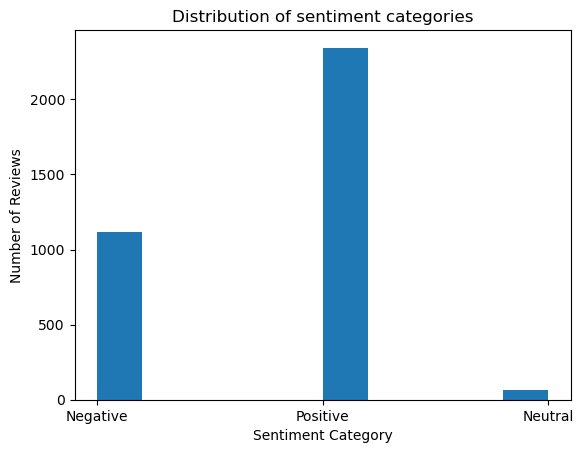

Number of reviews in each sentiment category:
Positive: 2344
Negative: 1119
Neutral: 68


In [52]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the sentiment scores of a review
def get_sentiment_scores(review):
    # Join the list of sentences into a single string
    review = ' '.join(review)
    # Get the sentiment scores of the review
    return analyzer.polarity_scores(review)

# Apply the sentiment analyzer to each review
sentiment_scores = [get_sentiment_scores(review) for review in reviews]

# Extract the compound score (overall sentiment score) from each review's sentiment scores
sentiment_scores = [score['compound'] for score in sentiment_scores]

# Categorize the reviews as positive, negative or neutral based on their compound score
sentiment_categories = []
for score in sentiment_scores:
    if score > 0.05:
        sentiment_categories.append('Positive')
    elif score < -0.05:
        sentiment_categories.append('Negative')
    else:
        sentiment_categories.append('Neutral')

# Plot the distribution of sentiment categories
import matplotlib.pyplot as plt

plt.hist(sentiment_categories)
plt.title('Distribution of sentiment categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Reviews')
plt.show()

# Print the number of reviews in each sentiment category
print('Number of reviews in each sentiment category:')
print('Positive:', sentiment_categories.count('Positive'))
print('Negative:', sentiment_categories.count('Negative'))
print('Neutral:', sentiment_categories.count('Neutral'))


In [ ]:
# THE PLOT ABOVE SHOWS THE CATEGORY OF SENTIMENTS IN THE REVIEWS GROUPED IN NEGATIVE, POSITIVE AND NEUTRAL.

In [ ]:
# The code below shows a Pie chart indicating the percentage of each Sentiment Category

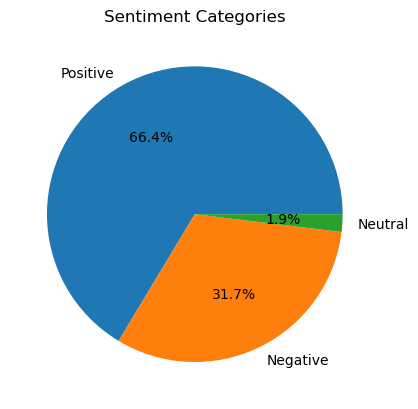

In [55]:
# Plot a pie chart showing the percentages of each sentiment category
plt.pie(pd.Series(sentiment_categories).value_counts(), labels=pd.Series(sentiment_categories).value_counts().index, autopct='%1.1f%%')
plt.title('Sentiment Categories')
plt.show()


In [ ]:
# The Pie chart above shows each percentage category of sentiments which indicates the Positive sentiments are 66.4% while Negative is 31.7%
# Insights from this charts shows there are twice as much Positive comments than Negative but for an improved Net promoter score. There should be more Positive and less Negative comments.

In [ ]:
# In conclusion the reviews obtained showed the Topics of most interest to the customers, indicating which products and services the customers tend give feedback about frequently.
# It also highlights the trend in the reviews to determine if they are mostly positive or Negative.
# For more insights on the subject Top words in each sentiment category can be further analyzed.